In [ ]:
import sys
import os
from PIL import Image
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import tensorflow
from sklearn.model_selection import train_test_split
import keras
from keras.utils import to_categorical
import cv2 as cv

In [ ]:
TDF = pd.read_csv('/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/train.csv')
TDF.head()

,class,image_path,name,xmax,xmin,ymax,ymin
0,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,797,701,262,211
1,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,932,786,329,238
2,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,736,657,275,229
3,7,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,986,786,136,0
4,8,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,667,549,228,179


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## find missing values in the csv file


import pandas as pd

# Read the CSV file
TDF = pd.read_csv('/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/train.csv')

# Search for specific values in the 'image_path' column
search_values = ["df2cb87bc0a777df092f3b4e81adcfe6", "dc13b32699962e9aa3dc8df689056955.jpg", "eb47905268258eb9ead8ccde10c1cb5e.jpg"]
pattern = "|".join(search_values)
filtered_rows = TDF[TDF['image_path'].str.contains(pattern, case=False, na=False)]

# Check if any rows match the search value
if filtered_rows.empty:
    print("Not found")
else:
    print(filtered_rows)


Not found


In [ ]:
# handeling negative values

def deal_with_neg(dataset):
    dataset['xmin'] = np.where(dataset['xmin'] < 0, 0, dataset['xmin'])
    dataset['xmax'] = np.where(dataset['xmax'] < 0, 0, dataset['xmax'])
    dataset['ymin'] = np.where(dataset['ymin'] < 0, 0, dataset['ymin'])
    dataset['ymax'] = np.where(dataset['ymax'] < 0, 0, dataset['ymax'])

In [ ]:
# Data frame parameters
TDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19938 entries, 0 to 19937
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       19938 non-null  int64 
 1   image_path  19938 non-null  object
 2   name        19938 non-null  object
 3   xmax        19938 non-null  int64 
 4   xmin        19938 non-null  int64 
 5   ymax        19938 non-null  int64 
 6   ymin        19938 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.1+ MB


In [ ]:
TDF_copy = TDF.copy()
deal_with_neg(TDF_copy)

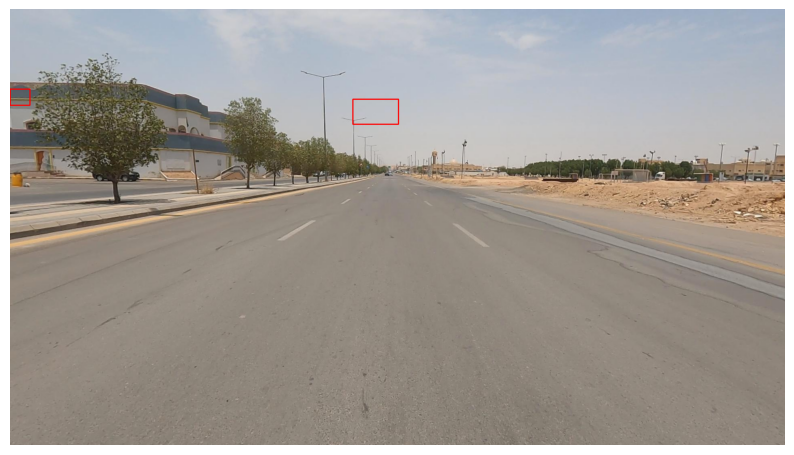

In [ ]:
import cv2
import matplotlib.pyplot as plt

def plot_bboxes(image_path, bboxes):
    """
    Plots bounding boxes on the image.

    Parameters:
        - image_path: Path to the image.
        - bboxes: List of bounding boxes. Each bounding box is a tuple (xmin, ymin, xmax, ymax).
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes on the image
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = map(int, bbox)  # Convert coordinates to integers
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()
import pandas as pd

def get_bboxes_for_image(image_name, df):
    """
    Returns bounding boxes for a specific image from the dataframe.

    Parameters:
        - image_name: Name of the image.
        - df: DataFrame containing bounding box information.

    Returns:
        - List of bounding boxes for the image.
    """
    # Filter rows for the given image name
    image_data = df[df['image_path'] == image_name]

    # Extract bounding box coordinates and return them
    bboxes = [(row['xmin'], row['ymin'], row['xmax'], row['ymax']) for _, row in image_data.iterrows()]
    return bboxes

# Get bounding boxes for a specific image
image_name = '0011b4d3f9068a9efbb84dc3157b76c9.jpg'  # replace with your image name
bboxes = get_bboxes_for_image(image_name, TDF_copy)

# Plot bounding boxes on the image
img_path = f"/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/all_images/{image_name}"  # adjust the path accordingly
plot_bboxes(img_path, bboxes)


In [ ]:
def double_boxes(dataset):
    dataset['xmin'] = np.where(dataset['xmin'] == 0, 2, dataset['xmin'] * 2)
    dataset['xmax'] = np.where(dataset['xmax'] == 0, 2, dataset['xmax'] * 2)
    dataset['ymin'] = np.where(dataset['ymin'] == 0, 2, dataset['ymin'] * 2)
    dataset['ymax'] = np.where(dataset['ymax'] == 0, 2, dataset['ymax'] * 2)

double_boxes(TDF_copy)

In [ ]:
# checking for the negative values
len(
    TDF_copy[
        (TDF_copy['xmax'] < 0) |
        (TDF_copy['xmin'] < 0) |
        (TDF_copy['ymax'] < 0) |
        (TDF_copy['ymin'] < 0)
    ]
)

0

In [ ]:
import cv2
import matplotlib.pyplot as plt

def plot_bboxes(image_path, bboxes):
    """
    Plots bounding boxes on the image.

    Parameters:
        - image_path: Path to the image.
        - bboxes: List of bounding boxes. Each bounding box is a tuple (xmin, ymin, xmax, ymax).
    """
    # Load the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes on the image
    for bbox in bboxes:
        xmin, ymin, xmax, ymax = map(int, bbox)  # Convert coordinates to integers
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis('off')
    plt.show()


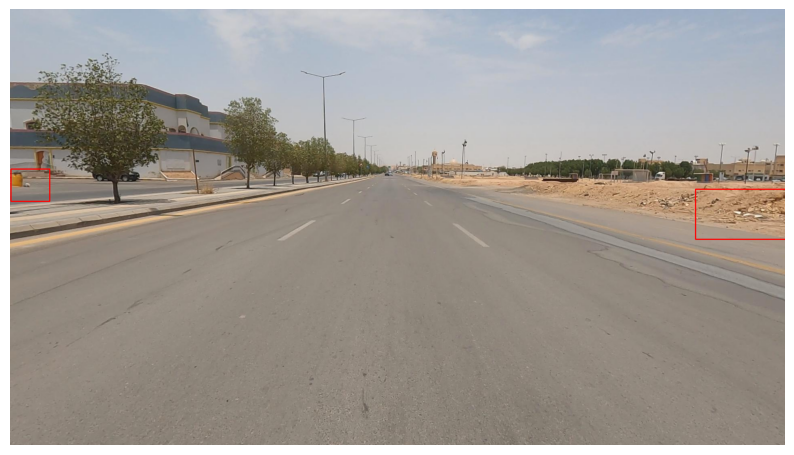

In [ ]:
import pandas as pd

def get_bboxes_for_image(image_name, df):
    """
    Returns bounding boxes for a specific image from the dataframe.

    Parameters:
        - image_name: Name of the image.
        - df: DataFrame containing bounding box information.

    Returns:
        - List of bounding boxes for the image.
    """
    # Filter rows for the given image name
    image_data = df[df['image_path'] == image_name]

    # Extract bounding box coordinates and return them
    bboxes = [(row['xmin'], row['ymin'], row['xmax'], row['ymax']) for _, row in image_data.iterrows()]
    return bboxes

# Get bounding boxes for a specific image
image_name = '0011b4d3f9068a9efbb84dc3157b76c9.jpg'  # replace with your image name
bboxes = get_bboxes_for_image(image_name, TDF_copy)

# Plot bounding boxes on the image
img_path = f"/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/all_images/{image_name}"  # adjust the path accordingly
plot_bboxes(img_path, bboxes)


##YOLO's model extra-parameters creation and data organization in files ordered in a specific manner to create the yaml file.

### Width and height are necessary parameters in training Yolo object detection models, we need to form them since that they are missing in our data

In [ ]:
TDF_copy['width'] = TDF_copy['xmax'] - TDF_copy['xmin']
TDF_copy['height'] = TDF_copy['ymax'] - TDF_copy['ymin']
TDF_copy.head()

,class,image_path,name,xmax,xmin,ymax,ymin,width,height
0,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1594,1402,524,422,192,102
1,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1864,1572,658,476,292,182
2,3,4a48c42c9579ec0399e6c5a3e825e765.jpg,GARBAGE,1472,1314,550,458,158,92
3,7,ea906a663da6321bcef78be4b7d1afff.jpg,BAD_BILLBOARD,1972,1572,272,2,400,270
4,8,1c7d48005a12d1b19261b8e71df7cafe.jpg,SAND_ON_ROAD,1334,1098,456,358,236,98


### Here we can see all of the categories of the data

In [ ]:
categories = TDF_copy["name"].unique()

idx = 1
for cls in categories:
    print(f'category {idx} : {cls}')
    idx += 1

category 1 : GARBAGE
category 2 : BAD_BILLBOARD
category 3 : SAND_ON_ROAD
category 4 : GRAFFITI
category 5 : POTHOLES
category 6 : CLUTTER_SIDEWALK
category 7 : CONSTRUCTION_ROAD
category 8 : BROKEN_SIGNAGE
category 9 : UNKEPT_FACADE
category 10 : FADED_SIGNAGE
category 11 : BAD_STREETLIGHT


The total number of instances we are going to use to build the model is 19938 instance 90% for training

In [ ]:
counts = TDF_copy['class'].value_counts()
counts_str = counts.to_string()
print(counts_str)

counts_list = counts.to_list()
counts_str = ', '.join(map(str, counts_list))

# Now we will sum the values in the counts list to get a total count of the instances we are going to use t build this model.

total_count = sum(counts_list)
print("")
print("The total number of instances: " + str(total_count))


3     8593
4     2730
2     2625
9     2245
7     1555
0     1124
8      748
10     127
1      107
5       83
6        1

The total number of instances: 19938


# Save the unique images and their labels in a specific folders, the order of the files needs to be followed exactly in this order otherwise we will face many errors and the training will not start.

### This process required by our YOLOV8 model and the previous versions 7 and 5, that the model need two folders (Train and Valid), and for each these two folders
### there are two folders (Images and Labels), inside the Images folders, there are the images, depend on the state of that images
### either a training images or the validation images, and we did the same for Labels folders, either for training or validation
### there are a number of text files, each file represent an image.
### inside each file, there is one or more lines, each represent the coordinates of an object, of that image.

### Example :-
### - Training folder
### - - Images folder
### - - - test_image.png
### - - Labels folder
### - - - test_image.txt
### - - - - inside the test_image.txt : (class_number) (x_coordinates) (y_coordinate) (image_width) (image_heghit)

### Note :
### (class_number) (x_coordinates) (y_coordinate) (image_width) (image_heghit) are numbers between 0 and 1.


In [ ]:
# This is out file generator, we will only run it once since it will save the data in google drive.

import os
import cv2 as cv
from sklearn.model_selection import train_test_split

def pascal_voc_to_yolo(x1, y1, x2, y2, image_w, image_h):
    return [((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

def save_images_labels(dataset, folder_name):
    # Split dataset into training and validation sets
    train_df, valid_df = train_test_split(dataset, test_size=0.2, random_state=42)

    # Save training and validation data
    _save_data(train_df, os.path.join(folder_name, 'Train'))
    _save_data(valid_df, os.path.join(folder_name, 'Valid'))

    # Generate .txt files with image paths
    with open(os.path.join(folder_name, 'train.txt'), 'w') as f:
        for img_path in train_df['image_path'].unique():
            f.write(os.path.join(folder_name, 'Train', 'Images', img_path) + '\n')

    with open(os.path.join(folder_name, 'val.txt'), 'w') as f:
        for img_path in valid_df['image_path'].unique():
            f.write(os.path.join(folder_name, 'Valid', 'Images', img_path) + '\n')

def _save_data(df, folder_name):
    # Ensure the required directories exist
    if not os.path.exists(os.path.join(folder_name, 'Labels')):
        os.makedirs(os.path.join(folder_name, 'Labels'))
    if not os.path.exists(os.path.join(folder_name, 'Images')):
        os.makedirs(os.path.join(folder_name, 'Images'))

    for i in df['image_path'].unique():
        img_objects = df[df["image_path"] == i]
        img = cv.imread(f'/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/all_images/{i}')

        if img is None:
            print(f"Failed to load image at: {i}")
            continue

        with open(os.path.join(folder_name, 'Labels', f'{i.split(".")[0]}.txt'), 'w') as f:
            for obj in img_objects.index:
                xmax = df['xmax'][obj]
                xmin = df['xmin'][obj]
                ymax = df['ymax'][obj]
                ymin = df['ymin'][obj]

                arr = pascal_voc_to_yolo(xmin, ymin, xmax, ymax, img.shape[1], img.shape[0])
                x, y, w, h = arr[0], arr[1], arr[2], arr[3]

                # Clipping to ensure values are between 0 and 1
                x = max(0, min(x, 1))
                y = max(0, min(y, 1))
                w = max(0, min(w, 1))
                h = max(0, min(h, 1))

                f.write(f'{int(df["class"][obj])} {x} {y} {w} {h}')

                if obj != len(img_objects.index) - 1:
                    f.write(f'\n')
            f.close()
            position = os.path.join(folder_name, 'Images', i)
            cv.imwrite(position, img)

# Call the function
folder_name = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT'
save_images_labels(TDF_copy, folder_name)


### Ensuring there is no data inconsistent between the actual images file and the csv file that contains data about data (Bbox coordinates, labels, image references)

In [ ]:
import os
import cv2 as cv
from sklearn.model_selection import train_test_split
counter = 0
for path in os.listdir('/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Train/Labels'):
    if (path.endswith(".txt")):
        with open(f'/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Train/Labels/{path}', 'r') as f:
            for i in f.readlines():
                arr = i.split(' ')
                #print(arr)
                if float(arr[1]) < 0 or float(arr[1]) > 1:
                    counter += 1
                if float(arr[2]) < 0 or float(arr[2]) > 1:
                    counter += 1
                if float(arr[3]) < 0 or float(arr[3]) > 1:
                    counter += 1
                if float(arr[4]) < 0 or float(arr[4]) > 1:
                    counter += 1
print(counter)

counter = 0
for path in os.listdir('/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Valid/Labels'):
    if (path.endswith(".txt")):
        with open(f'/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Valid/Labels/{path}', 'r') as f:
            for i in f.readlines():
                arr = i.split(' ')
                #print(arr)
                if float(arr[1]) < 0 or float(arr[1]) > 1:
                    counter += 1
                if float(arr[2]) < 0 or float(arr[2]) > 1:
                    counter += 1
                if float(arr[3]) < 0 or float(arr[3]) > 1:
                    counter += 1
                if float(arr[4]) < 0 or float(arr[4]) > 1:
                    counter += 1
print(counter)

0
0





# create the yaml file




In [ ]:
'''

# not in use anymore do not use it




import yaml

def generate_data_yaml(num_classes, class_names, folder_name):
    data = {
        'nc': num_classes,
        'names': class_names,
        'train': os.path.join(folder_name, 'train.txt'),
        'val': os.path.join(folder_name, 'val.txt'),
        'img_dir': os.path.join(folder_name, 'Images')
    }

    with open(os.path.join(folder_name, 'data.yaml'), 'w') as outfile:
        yaml.dump(data, outfile, default_flow_style=False)

# Example usage:
num_classes = 11 # Replace with your actual number of classes
class_names = [
    'GARBAGE',
    'BAD_BILLBOARD',
    'SAND_ON_ROAD',
    'GRAFFITI',
    'POTHOLES',
    'CLUTTER_SIDEWALK',
    'CONSTRUCTION_ROAD',
    'BROKEN_SIGNAGE',
    'UNKEPT_FACADE',
    'FADED_SIGNAGE',
    'BAD_STREETLIGHT']  # Replace with your actual class names
folder_name = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT'

generate_data_yaml(num_classes, class_names, folder_name)
'''

In [ ]:
#import locale
#def getpreferredencoding(do_setlocale = True):
#    return "UTF-8"
#locale.getpreferredencoding = getpreferredencoding
# In case of normal installation not working uncomment all of the above lines

!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 9.9 MB/s eta 0:00:00


In [ ]:
!pip install clearml

In [ ]:
%pip install --upgrade clearml tensorboard ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.7 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires tensorboard<2.15,>=2.14, but you have tensorboard 2.15.1 which is incompatible.


In [ ]:
import clearml
clearml.browser_login()

<IPython.core.display.Javascript object>


🤖 ClearML connected successfully - let's build something! 🚀



                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

100%|██████████| 6.23M/6.23M [00:00<00:00, 348MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

YOLOv8n summary: 225 layers, 3157200 parameters, 3157184 gradients, 8.9 GFLOPs

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=No

100%|██████████| 755k/755k [00:00<00:00, 122MB/s]


Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Data/labels/train.cache... 7240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 7240/7240 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1, len(boxes) = 15944. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
ClearML Monitor: Could not detect iteration reporting, falling back to iterations as seconds-from-start


val: Scanning /content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Data/labels/valid.cache... 3105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3105/3105 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.28G      2.459      4.272      2.285         12        640: 100%|██████████| 453/453 [01:03<00:00,  7.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [04:35<00:00,  2.81s/it]


                   all       3105       3988      0.475      0.154     0.0505     0.0184

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.22G      2.129      3.077       2.05         19        640: 100%|██████████| 453/453 [00:54<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.19it/s]


                   all       3105       3988      0.394      0.178     0.0676     0.0279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.34G       2.07      2.706      2.028         17        640: 100%|██████████| 453/453 [00:54<00:00,  8.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:19<00:00,  5.07it/s]


                   all       3105       3988      0.439      0.189     0.0816     0.0328

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.34G      2.033      2.529      2.001         26        640: 100%|██████████| 453/453 [00:54<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.28it/s]


                   all       3105       3988      0.435      0.182     0.0921     0.0381

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.32G      1.994      2.402      1.959         12        640: 100%|██████████| 453/453 [00:54<00:00,  8.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.23it/s]


                   all       3105       3988       0.43      0.221      0.105     0.0441

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.34G      1.967       2.32      1.941         19        640: 100%|██████████| 453/453 [00:54<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.29it/s]


                   all       3105       3988      0.445      0.232      0.113     0.0462

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.33G      1.941      2.261      1.898         22        640: 100%|██████████| 453/453 [00:54<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]


                   all       3105       3988      0.354      0.237      0.123     0.0524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.34G       1.91      2.182      1.877         16        640: 100%|██████████| 453/453 [00:54<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.21it/s]


                   all       3105       3988      0.458      0.237      0.127     0.0531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.32G      1.888      2.121      1.858         11        640: 100%|██████████| 453/453 [00:54<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.29it/s]


                   all       3105       3988      0.258      0.251      0.139     0.0609

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.33G       1.87      2.066      1.847         24        640: 100%|██████████| 453/453 [00:54<00:00,  8.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:18<00:00,  5.26it/s]


                   all       3105       3988      0.266      0.369      0.153     0.0676

10 epochs completed in 0.285 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 98/98 [00:19<00:00,  5.01it/s]


                   all       3105       3988      0.264      0.367      0.153     0.0675
              GRAFFITI       3105        219      0.189      0.589      0.208      0.101
         FADED_SIGNAGE       3105         18      0.146      0.111     0.0702     0.0298
              POTHOLES       3105        560      0.172      0.177      0.101     0.0389
               GARBAGE       3105       1685      0.137      0.518      0.161     0.0649
     CONSTRUCTION_ROAD       3105        538      0.156      0.706      0.259      0.108
        BROKEN_SIGNAGE       3105         18          1          0     0.0145    0.00915
         BAD_BILLBOARD       3105        301      0.214      0.362      0.192     0.0948
          SAND_ON_ROAD       3105        149      0.188      0.275      0.141     0.0585
      CLUTTER_SIDEWALK       3105        469      0.163      0.812      0.284      0.132
        UNKEPT_FACADES       3105         31      0.278      0.124     0.0964     0.0393
Speed: 0.1ms preproce

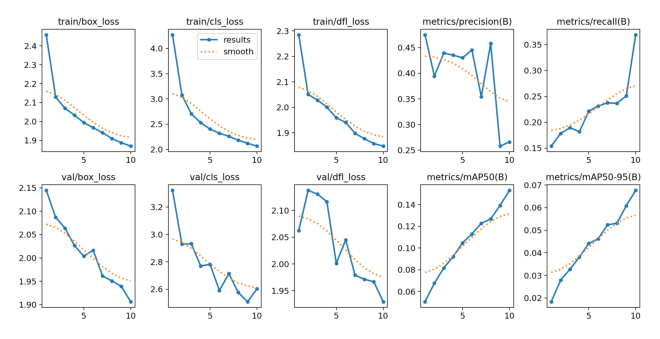

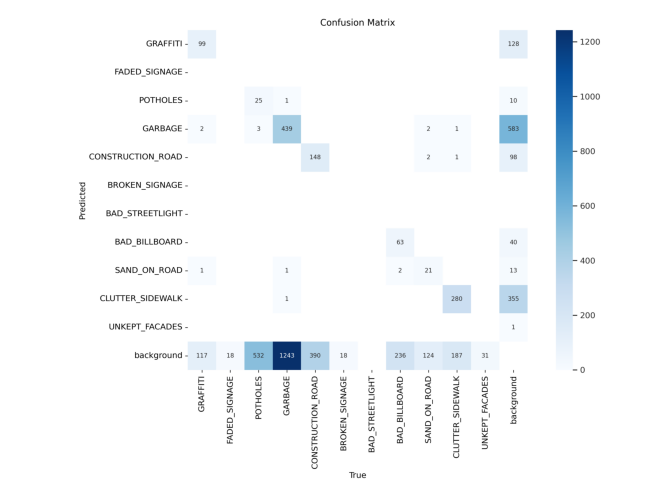

2023-12-02 03:41:31,459 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLOv8/train.5d3b8861cc0b4f8e92acecf623989949/models/best.pt


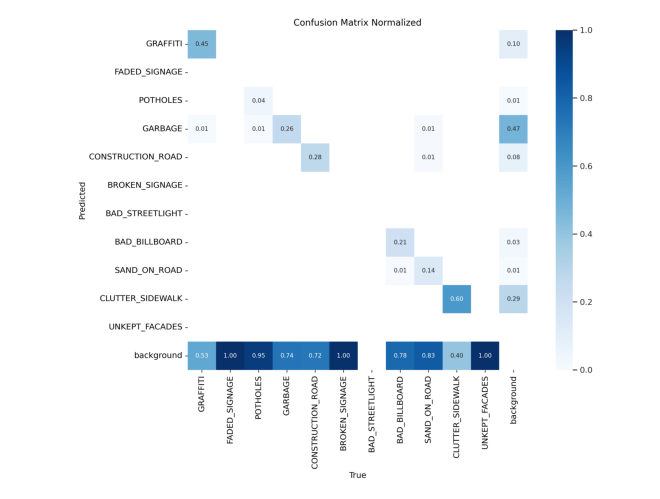

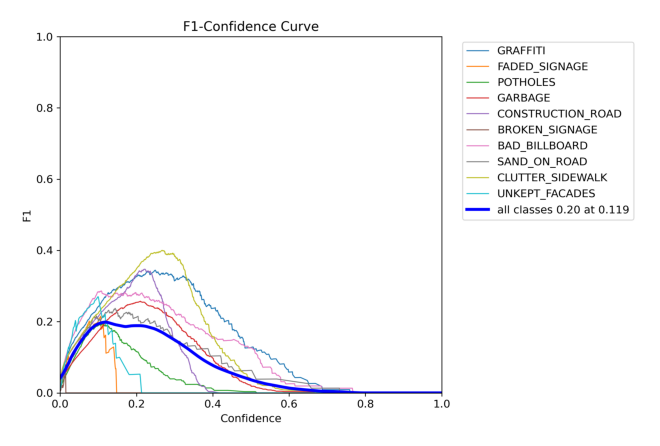

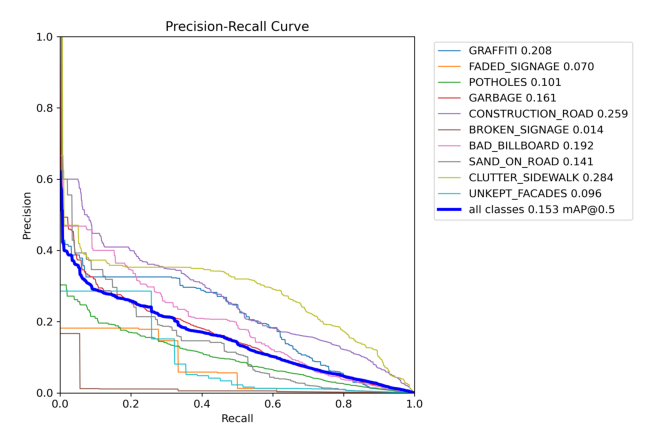

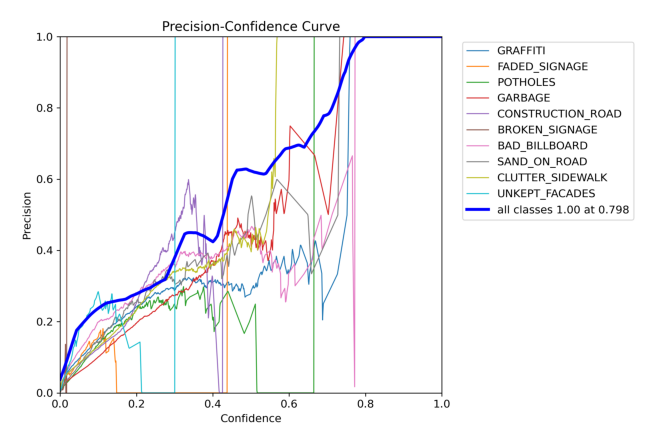

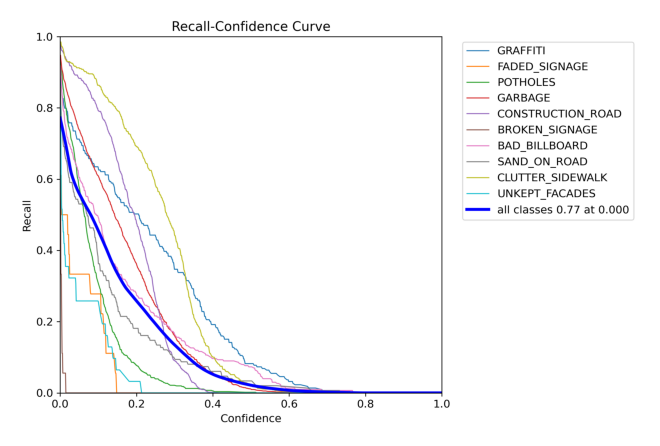

In [ ]:
'''
from ultralytics import YOLO

# Load the model.
model = YOLO('yolov8n.pt')

# Training.
results = model.train(
   data='/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/data.yaml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_v8_10e'
)
'''

# Model training
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from YAML
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/data.yaml', epochs=10, imgsz=640)

In [ ]:
''' not in use anymore do not use it

def save_images_labels(dataset, folder_name):
    for i in dataset['image_path'].unique():
        img_objects = dataset[dataset["image_path"] == i]
        img = cv.imread('dataset/images/' + i)

        with open(f'{folder_name}/Labels/{i.split(".")[0]}.txt', 'w') as f:
            for obj in img_objects.index:
                xmax = dataset['xmax'][obj]
                xmin = dataset['xmin'][obj]
                ymax = dataset['ymax'][obj]
                ymin = dataset['ymin'][obj]

                arr = pascal_voc_to_yolo(xmin, ymin, xmax, ymax, img.shape[1], img.shape[0])
                x, y, w, h = arr[0], arr[1], arr[2], arr[3]

                if x < 0:
                    x = 0
                elif x > 1:
                    x = 1
                if y < 0:
                    y = 0
                elif y > 1:
                    y = 1
                if w < 0:
                    w = 0
                elif w > 1:
                    w = 1
                if h < 0:
                    h = 0
                elif h > 1:
                    h = 1

                f.write(f'{int(train["class"][obj])} {x} {y} {w} {h}')

                if obj != len(img_objects.index) - 1:
                    f.write(f'\n')
            f.close()
            position = fr'{folder_name}/Images/{i}'
            cv.imwrite(position, img)

In [ ]:
'''

# Not in use anymore

import os
import shutil

# Source directories
train_images_source = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Train/Images'
valid_images_source = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Valid/Images'
train_labels_source = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Train/Labels'
valid_labels_source = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Valid/Labels'

# Destination directory
destination_folder = '/content/drive/MyDrive/EVC VISUAL POLLUTION FINAL PROJECT/Data'

# Copy function
def copy_data(images_source, labels_source, images_destination, labels_destination):
    os.makedirs(images_destination, exist_ok=True)
    os.makedirs(labels_destination, exist_ok=True)

    image_files = os.listdir(images_source)
    for image_file in image_files:
        image_source_path = os.path.join(images_source, image_file)
        image_dest_path = os.path.join(images_destination, image_file)
        shutil.copy(image_source_path, image_dest_path)

        label_file = f"{os.path.splitext(image_file)[0]}.txt"
        label_source_path = os.path.join(labels_source, label_file)
        label_dest_path = os.path.join(labels_destination, label_file)
        shutil.copy(label_source_path, label_dest_path)

# Copy training data
train_images_dest = os.path.join(destination_folder, 'images', 'train')
train_labels_dest = os.path.join(destination_folder, 'labels', 'train')
copy_data(train_images_source, train_labels_source, train_images_dest, train_labels_dest)

# Copy validation data
valid_images_dest = os.path.join(destination_folder, 'images', 'valid')
valid_labels_dest = os.path.join(destination_folder, 'labels', 'valid')
copy_data(valid_images_source, valid_labels_source, valid_images_dest, valid_labels_dest)

print("Data reformatting completed.")


Data reformatting completed.


In [ ]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 20556, done.
remote: Counting objects: 100% (1743/1743), done.
remote: Compressing objects: 100% (987/987), done.
remote: Total 20556 (delta 1061), reused 1191 (delta 752), pack-reused 18813
Receiving objects: 100% (20556/20556), 11.44 MiB | 14.09 MiB/s, done.
Resolving deltas: 100% (14226/14226), done.


In [ ]:
%cd /content/ultralytics

/content/ultralytics


In [ ]:
!pip install -r requirements.txt

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 659.4/659.4 kB 4.6 MB/s eta 0:00:00


#Demo video

In [ ]:
!gdown https://drive.google.com/uc?id=1yo3oJCocjhKZr-I1BTZ_UyfSs1FFg3ij


Downloading...
From: https://drive.google.com/uc?id=1yo3oJCocjhKZr-I1BTZ_UyfSs1FFg3ij
To: /content/ultralytics/Copy of sections.mp4
100% 298M/298M [00:06<00:00, 43.7MB/s]


In [ ]:
%cd /content/
!yolo task=detect mode=predict model=/content/10epoch.pt conf=0.25 source="/content/ultralytics/Copy of sections.mp4"

/content
Ultralytics YOLOv8.0.223 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8n summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 171.9ms
video 1/1 (2/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 9.1ms
video 1/1 (3/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 9.4ms
video 1/1 (4/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 10.2ms
video 1/1 (5/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 8.5ms
video 1/1 (6/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 9.6ms
video 1/1 (7/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 9.5ms
video 1/1 (8/3844) /content/ultralytics/Copy of sections.mp4: 384x640 (no detections), 8.7ms
video 1/1 (9/3844) /content/ultralytics/Copy of sections.mp4: 